## Percolation on a lattice

In [2]:
import numpy as np
from tqdm import tqdm_notebook
import matplotlib.pyplot as plt

### First attempt: P(x, y, l) in terms of P(x', y', l-1)
- This is wrong: note that terms blow up for p=.5

In [3]:
MAX_COORD = 200
p = 0.5

In [4]:
prob = np.zeros((MAX_COORD, MAX_COORD, MAX_COORD))
prob[100][100][0] = 1
for l in tqdm(range(1, prob.shape[2])):
    for x in range(MAX_COORD):
        for y in range(MAX_COORD):
            prob[x][y][l] = p * ((0 if x<=0 else prob[x-1][y][l-1]) + 
                                 (0 if y<=0 else prob[x][y-1][l-1]) +
                                 (0 if x>=MAX_COORD-1 else prob[x+1][y][l-1]) +
                                 (0 if y>=MAX_COORD-1 else prob[x][y+1][l-1]))

100%|██████████| 199/199 [00:37<00:00,  5.00it/s]


/Users/justin/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log10
  """Entry point for launching an IPython kernel.


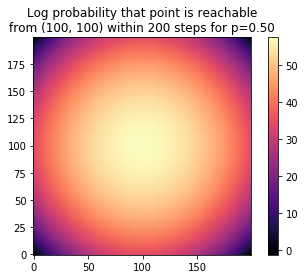

In [8]:
plt.imshow(np.log10(prob[:, :, MAX_COORD-1] + prob[:, :, MAX_COORD-2]), cmap='magma', origin='bottom left')
plt.colorbar()
plt.title("Log probability that point is reachable\nfrom (%d, %d) within %d steps for p=%.2f" % (MAX_COORD/2, MAX_COORD/2, MAX_COORD, p))
plt.savefig("lattice_percolation_100_0.5.pdf", dpi=1000)
plt.show()

In [52]:
MAX_COORD = 200
p = 0.1

In [53]:
prob = np.zeros((MAX_COORD, MAX_COORD, MAX_COORD))
prob[100][100][0] = 1
for l in tqdm(range(1, prob.shape[2])):
    for x in range(MAX_COORD):
        for y in range(MAX_COORD):
            prob[x][y][l] = p * ((0 if x<=0 else prob[x-1][y][l-1]) + 
                                 (0 if y<=0 else prob[x][y-1][l-1]) +
                                 (0 if x>=MAX_COORD-1 else prob[x+1][y][l-1]) +
                                 (0 if y>=MAX_COORD-1 else prob[x][y+1][l-1]))

100%|██████████| 199/199 [00:39<00:00,  5.20it/s]


/Users/justin/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log10
  """Entry point for launching an IPython kernel.


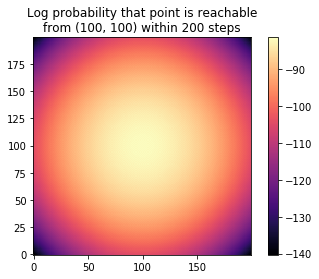

In [55]:
plt.imshow(np.log10(prob[:, :, MAX_COORD-1] + prob[:, :, MAX_COORD-2]), cmap='magma', origin='bottom left')
plt.colorbar()
plt.title("Log probability that point is reachable\nfrom (%d, %d) within %d steps" % (MAX_COORD/2, MAX_COORD/2, MAX_COORD))
plt.show()

### Second attempt: P(x, y, l, dir) 
- Where now we only count paths that don't reuse edges, and that you enter (x, y) from that direction

In [3]:
MAX_COORD = 200
p = 0.5

In [29]:
prob = np.zeros((MAX_COORD, MAX_COORD, MAX_COORD, 4))
for d in range(4):
    prob[100][100][0][d] = 1
prob[100][100][1][0] = p
prob[100][101][1][1] = p
prob[100][101][1][2] = p
prob[100][101][1][3] = p
for l in tqdm(range(1, prob.shape[2])):
    for x in range(MAX_COORD):
        for y in range(MAX_COORD):
            prob[x][y][l][0] = 0 if y >= MAX_COORD-1 else p * (prob[x][y+1][l-1][0] +
                                                               prob[x][y+1][l-1][1] + 
                                                               prob[x][y+1][l-1][3])
            prob[x][y][l][1] = 0 if x >= MAX_COORD-1 else p * (prob[x+1][y][l-1][0] +
                                                               prob[x+1][y][l-1][1] + 
                                                               prob[x+1][y][l-1][2])
            prob[x][y][l][2] = 0 if y <= 0 else p * (prob[x][y-1][l-1][1] +
                                                     prob[x][y-1][l-1][2] +
                                                     prob[x][y-1][l-1][3])
            prob[x][y][l][3] = 0 if x >= 0 else p * (prob[x-1][y][l-1][0] +
                                                     prob[x-1][y][l-1][2] + 
                                                     prob[x-1][y][l-1][3])

100%|██████████| 199/199 [01:59<00:00,  1.76it/s]


/Users/justin/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log10
  """Entry point for launching an IPython kernel.


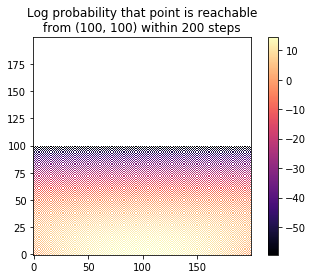

In [27]:
plt.imshow(np.log10(np.sum(prob[:, :, MAX_COORD-1, :], axis=2)), cmap='magma', origin='bottom left')
plt.colorbar()
plt.title("Log probability that point is reachable\nfrom (%d, %d) within %d steps" % (MAX_COORD/2, MAX_COORD/2, MAX_COORD))
plt.show()

## Empirically finding p for square lattice

In [88]:
def size_of_cluster_containing_origin(p, max_coord=500):
    edges = np.random.binomial(1, p, (2*max_coord, 2*max_coord, 2))
    def bfs(u, visited):
        stack = [u]
        while len(stack) > 0:
            x, y = stack.pop()
            if x > 0 and edges[x-1][y][1] == 1 and ((x-1, y) not in visited):
                visited.add((x-1, y))
                stack.append((x-1, y))
            if x < 2*max_coord-1 and edges[x][y][1] == 1 and ((x+1, y) not in visited):
                visited.add((x+1, y))
                stack.append((x+1, y))
            if y > 0 and edges[x][y-1][0] == 1 and ((x, y-1) not in visited):
                visited.add((x, y-1))
                stack.append((x, y-1))
            if y < 2*max_coord-1 and edges[x][y][0] == 1 and ((x, y+1) not in visited):
                visited.add((x, y+1))
                stack.append((x, y+1))
    visited = set()
    origin = (max_coord, max_coord)
    visited.add(origin)
    bfs(origin, visited)
    return len(visited)

In [89]:
def average_size_of_cluster_containing_origin(p, max_coord=500, n_iter=100):
    count = 0
    for i in range(n_iter):
        count += size_of_cluster_containing_origin(p, max_coord)
    return count / n_iter

In [90]:
ps = np.linspace(0.0, 1.0, num=100)
sz = [average_size_of_cluster_containing_origin(p, max_coord=100, n_iter=30) for p in tqdm_notebook(ps)]

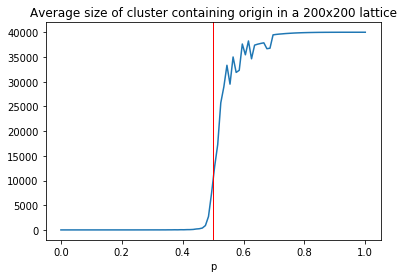

In [91]:
plt.plot(ps, sz)
plt.title("Average size of cluster containing origin in a 200x200 lattice")
plt.xlabel("p")
plt.axvline(0.5, lw=1, c='r')
plt.savefig("lattice_percolation_empirical.pdf", dpi=1000)
plt.show()

#### Figures for proof

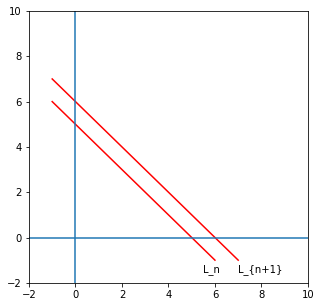

In [43]:
from matplotlib.lines import Line2D  
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111)
ax.add_line(Line2D([-1, 6], [6, -1], color='r'))
ax.add_line(Line2D([-1, 7], [7, -1], color='r'))
ax.set_xlim(-2, 10)
ax.set_ylim(-2, 10)
plt.axvline(0)
plt.axhline(0)
plt.text(5.5, -1.5, "L_n")
plt.text(7, -1.5, "L_{n+1}")
plt.savefig("ln_plot.pdf", dpi=1000)
plt.show()

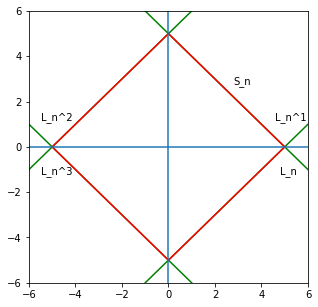

In [69]:
from matplotlib.lines import Line2D  
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111)
ax.add_line(Line2D([-1, 6], [6, -1], color='g'))
ax.add_line(Line2D([-1, 6], [-6, 1], color='g'))
ax.add_line(Line2D([-6, 1], [1, -6], color='g'))
ax.add_line(Line2D([-6, 1], [-1, 6], color='g'))
ax.add_line(Line2D([0, 5], [5, 0], color='r'))
ax.add_line(Line2D([5, 0], [0, -5], color='r'))
ax.add_line(Line2D([0, -5], [-5, 0], color='r'))
ax.add_line(Line2D([-5, 0], [0, 5], color='r'))
ax.set_xlim(-6, 6)
ax.set_ylim(-6, 6)
plt.axvline(0)
plt.axhline(0)
plt.text(2.8, 2.8, "S_n")
plt.text(4.8, -1.2, "L_n")
plt.text(4.6, 1.2, "L_n^1")
plt.text(-5.5, -1.2, "L_n^3")
plt.text(-5.5, 1.2, "L_n^2")
plt.savefig("sn_plot.pdf", dpi=1000)
plt.show()

## Lattice invasion

In [190]:
def invasion_from_origin(max_coord=500, max_iter=500):
    edges = np.random.uniform(0, 1, (2*max_coord, 2*max_coord, 2))
    cvals = []
    inactive_edges = set()
    active_edges = {(max_coord, max_coord, 0): edges[max_coord][max_coord][0], 
                    (max_coord, max_coord, 1): edges[max_coord][max_coord][1], 
                    (max_coord, max_coord-1, 0): edges[max_coord][max_coord-1][0],
                    (max_coord-1, max_coord, 1): edges[max_coord-1][max_coord][1]}
    
    def add_active_edges(x, y):
        if x > 0 and (x-1, y, 1) not in inactive_edges and (x-1, y, 1) not in active_edges:
            active_edges[(x-1, y, 1)] = edges[x-1][y][1]
        if x < 2*max_coord-1 and (x, y, 1) not in inactive_edges and (x, y, 1) not in active_edges:
            active_edges[(x, y, 1)] = edges[x][y][1]
        if y > 0 and (x, y-1, 0) not in inactive_edges and (x, y-1, 0) not in active_edges:
            active_edges[(x, y-1, 0)] = edges[x][y-1][0]
        if y < 2*max_coord-1 and (x, y, 0) not in inactive_edges and (x, y, 0) not in active_edges:
            active_edges[(x, y, 0)] = edges[x][y][0]
    
    count = 0
    while len(active_edges) > 0 and count < max_iter:
        x, y, d = min(active_edges, key=active_edges.get)
        cvals.append(min(active_edges.values()))
        del active_edges[(x, y, d)]
        inactive_edges.add((x, y, d))
        add_active_edges(x, y)
        if d == 0:
            add_active_edges(x, y+1)
        else:
            add_active_edges(x+1, y)
        count += 1
    return cvals

In [308]:
def cvals_of_invasion(n_iter=100, max_coord=500):
    cvals = []
    for i in tqdm_notebook(range(n_iter)):
        cvals.extend(invasion_from_origin(max_coord=max_coord)[-100:])
    return cvals

In [321]:
cvals = cvals_of_invasion(n_iter=1000)

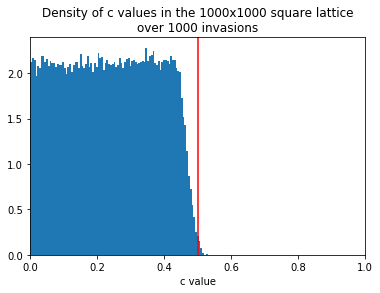

In [322]:
plt.hist(cvals, bins=100, density=True);
plt.xlim(0, 1);
plt.title("Density of c values in the 1000x1000 square lattice\nover 1000 invasions")
plt.xlabel("c value")
plt.axvline(0.5, c='r')
plt.savefig("lattice_invasion_density.pdf", dpi=1000)
plt.show()

In [156]:
def lim_sup_of_invasion(n_iter=100, max_coord=500, max_iter=500):
    cvals = []
    for i in tqdm_notebook(range(n_iter)):
        cvals.append(np.mean(invasion_from_origin(max_coord=max_coord, max_iter=max_iter)[-100:]))
    return cvals

In [145]:
lim_sups = lim_sup_of_invasion(n_iter=1000, max_iter=1000)

Average lim sup: 0.226037


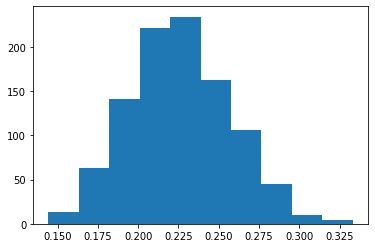

In [147]:
print("Average lim sup: %f" % (sum(lim_sups) / len(lim_sups)))
plt.hist(lim_sups)
plt.show()

## Invasion on regular graphs

In [312]:
def invasion_on_regular_graph(d, n_iter=500):
    cvals = []
    active = set()
    newc = np.random.uniform(0, 1, d)
    for c in newc:
        active.add(c)
    for i in range(n_iter):
        minval = min(list(active))
        cvals.append(minval)
        active.remove(minval)
        newc = np.random.uniform(0, 1, d-1)
        for c in newc:
            active.add(c)
    return cvals

In [315]:
def cvals_of_invasion_on_regular_graph(d, n_iter=100):
    cvals = []
    for i in tqdm_notebook(range(n_iter)):
        cvals.extend(invasion_on_regular_graph(d)[-100:])
    return cvals

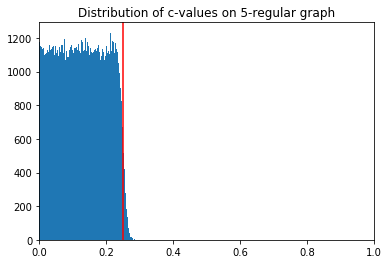

In [316]:
d = 5
cvals = cvals_of_invasion_on_regular_graph(d, n_iter=1000)
plt.hist(cvals, bins=100)
plt.axvline(1/(d-1), c='r')
plt.xlim(0, 1)
plt.title("Distribution of c-values on %d-regular graph" % d)
plt.savefig("invasion_"+str(d)+"_regular.pdf", dpi=1000)
plt.show()

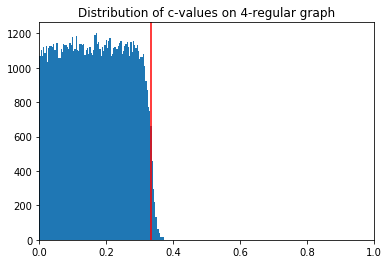

In [318]:
d = 4
cvals = cvals_of_invasion_on_regular_graph(d, n_iter=1000)
plt.hist(cvals, bins=100)
plt.axvline(1/(d-1), c='r')
plt.xlim(0, 1)
plt.title("Distribution of c-values on %d-regular graph" % d)
plt.savefig("invasion_"+str(d)+"_regular.pdf", dpi=1000)
plt.show()

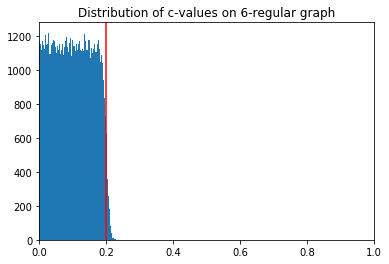

In [319]:
d = 6
cvals = cvals_of_invasion_on_regular_graph(d, n_iter=1000)
plt.hist(cvals, bins=100)
plt.axvline(1/(d-1), c='r')
plt.xlim(0, 1)
plt.title("Distribution of c-values on %d-regular graph" % d)
plt.savefig("invasion_"+str(d)+"_regular.pdf", dpi=1000)
plt.show()